# 8장. 텍스트빈도분석 - 1.영어단어분석

In [85]:
!pip install matplotlib 

In [86]:
!pip install wordcloud

In [87]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [88]:
import nltk   

In [89]:
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 1. 데이터 준비

### 1-1. 파일 병합

In [90]:
# 관련 데이터 (엑셀파일) 불러오기
all_files = glob.glob('./myCabinetExcelData*.xls')

all_files 

['./myCabinetExcelData (4).xls',
 './myCabinetExcelData (2).xls',
 './myCabinetExcelData (3).xls',
 './myCabinetExcelData (1).xls',
 './myCabinetExcelData.xls']

In [91]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Copper Losses of Flyback Transformer: Search f...,"Larouci, C.; Keradec, J.-P.; Ferrieux, J.-P.; ...",IEEE; 1999,2003
1,NaN,2,50 Years of Piezoelectric Transformers: Trends...,"Carazo, A. V.","Warrendale, Pa.; Materials Research Society; 1999",2004
2,NaN,3,Modelling and Control of Transformer-less Univ...,"Venkatraman, K.; Moorthi, S.; Selvan, M. P.",Springer Science + Business Media,2017
3,NaN,4,Solid/vapour sorption heat transformer: Design...,"Haije, W. G.; Veldhuis, J. B.; Smeding, S. F.;...","Elsevier Science B.V., Amsterdam.",2007
4,NaN,5,Parallel Operation of Transformer-Based Improv...,"Aleem, Zeeshan; Winberg, Simon L.; Ahmed, Hafi...",IEEE,2022
...,...,...,...,...,...,...
95,NaN,96,A Single-Phase Five-Level Transformer-Less PV ...,"Zhu, Xiaonan; Wang, Hongliang; Zhang, Wenyuan;...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2021
96,NaN,97,Video-distribution amplifier eliminates inters...,"Naidich,H.H",McGraw-Hill Pub. Co.,1961
97,NaN,98,Two of the three Transformer-2 genes are requi...,"Li, Xiaocong; Jin, Binbin; Dong, Yunqiao; Chen...","Elsevier Science B.V., Amsterdam.",2019
98,NaN,99,SOLID-STATE CONTROL FOR TRANSFORMER-TAP CHANGING,"Bauer, P.;de Haan, S. W. H.;Paap, G. C.",Technical University of Budapest,1996


In [92]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Copper Losses of Flyback Transformer: Search f...,"Larouci, C.; Keradec, J.-P.; Ferrieux, J.-P.; ...",IEEE; 1999,2003
1,NaN,2,50 Years of Piezoelectric Transformers: Trends...,"Carazo, A. V.","Warrendale, Pa.; Materials Research Society; 1999",2004
2,NaN,3,Modelling and Control of Transformer-less Univ...,"Venkatraman, K.; Moorthi, S.; Selvan, M. P.",Springer Science + Business Media,2017
3,NaN,4,Solid/vapour sorption heat transformer: Design...,"Haije, W. G.; Veldhuis, J. B.; Smeding, S. F.;...","Elsevier Science B.V., Amsterdam.",2007
4,NaN,5,Parallel Operation of Transformer-Based Improv...,"Aleem, Zeeshan; Winberg, Simon L.; Ahmed, Hafi...",IEEE,2022
...,...,...,...,...,...,...
495,NaN,96,Transformer-Coupled Converter for Voltage Modu...,"Gonzalez, M. C.; Vasic, M.; Alou, P.; Garcia, ...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2013
496,NaN,97,Transformers: Jeppesen Unfolds a New Map Why t...,"Larson, G.C.",MCGRAW-HILL,2011
497,NaN,98,Transformers: The Game,unknown,VNU BUSINESS PUBLICATIONS,2007
498,NaN,99,TransforMED: End-to-Εnd Transformers for Evide...,"Stylianou, Nikolaos; Vlahavas, Ioannis","Elsevier Science B.V., Amsterdam",2021


In [93]:
all_files_data_concat.to_csv('./riss_bigdata.csv', encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [94]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0      Copper Losses of Flyback Transformer: Search f...
1      50 Years of Piezoelectric Transformers: Trends...
2      Modelling and Control of Transformer-less Univ...
3      Solid/vapour sorption heat transformer: Design...
4      Parallel Operation of Transformer-Based Improv...
                             ...                        
495    Transformer-Coupled Converter for Voltage Modu...
496    Transformers: Jeppesen Unfolds a New Map Why t...
497                               Transformers: The Game
498    TransforMED: End-to-Εnd Transformers for Evide...
499    Transformer-Coupled Multiport ZVS Bidirectiona...
Name: 제목, Length: 500, dtype: object

In [95]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [96]:
words = []  

for title in all_title:
    # 영어를 제외한 문자 제거
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [97]:
print(words)  #출력하여 내용 확인

[['copper', 'loss', 'flyback', 'transformer', 'search', 'analytical', 'expression'], ['year', 'piezoelectric', 'transformer', 'trend', 'technology'], ['modelling', 'control', 'transformer', 'le', 'universal', 'power', 'quality', 'conditioner', 'tunpqc', 'effective', 'solution', 'power', 'quality', 'enhancement', 'distribution', 'system'], ['solid', 'vapour', 'sorption', 'heat', 'transformer', 'design', 'performance'], ['parallel', 'operation', 'transformer', 'based', 'improved', 'z', 'source', 'inverter', 'high', 'boost', 'interleaved', 'control'], ['x', 'ghz', 'transformer', 'injection', 'miller', 'frequency', 'divider', 'formula', 'shown', 'cmos'], ['magnetoelectric', 'particulate', 'composite', 'transformer', 'design', 'characterization'], ['thermal', 'calculation', 'transformer', 'type', 'radiator'], ['high', 'temperature', 'superconducting', 'demonstrator', 'transformer', 'design', 'consideration', 'first', 'test', 'result'], ['low', 'mismatch', 'low', 'loss', 'transformer', 'base

In [98]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['copper', 'loss', 'flyback', 'transformer', 'search', 'analytical', 'expression', 'year', 'piezoelectric', 'transformer', 'trend', 'technology', 'modelling', 'control', 'transformer', 'le', 'universal', 'power', 'quality', 'conditioner', 'tunpqc', 'effective', 'solution', 'power', 'quality', 'enhancement', 'distribution', 'system', 'solid', 'vapour', 'sorption', 'heat', 'transformer', 'design', 'performance', 'parallel', 'operation', 'transformer', 'based', 'improved', 'z', 'source', 'inverter', 'high', 'boost', 'interleaved', 'control', 'x', 'ghz', 'transformer', 'injection', 'miller', 'frequency', 'divider', 'formula', 'shown', 'cmos', 'magnetoelectric', 'particulate', 'composite', 'transformer', 'design', 'characterization', 'thermal', 'calculation', 'transformer', 'type', 'radiator', 'high', 'temperature', 'superconducting', 'demonstrator', 'transformer', 'design', 'consideration', 'first', 'test', 'result', 'low', 'mismatch', 'low', 'loss', 'transformer', 'based', 'spdt', 'switch

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [99]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'copper': 2,
         'loss': 8,
         'flyback': 4,
         'transformer': 529,
         'search': 3,
         'analytical': 6,
         'expression': 2,
         'year': 1,
         'piezoelectric': 7,
         'trend': 2,
         'technology': 10,
         'modelling': 3,
         'control': 15,
         'le': 64,
         'universal': 1,
         'power': 98,
         'quality': 10,
         'conditioner': 4,
         'tunpqc': 1,
         'effective': 2,
         'solution': 5,
         'enhancement': 6,
         'distribution': 21,
         'system': 38,
         'solid': 7,
         'vapour': 1,
         'sorption': 1,
         'heat': 2,
         'design': 19,
         'performance': 7,
         'parallel': 4,
         'operation': 5,
         'based': 138,
         'improved': 1,
         'z': 5,
         'source': 15,
         'inverter': 42,
         'high': 39,
         'boost': 14,
         'interleaved': 3,
         'x': 13,
         'ghz': 21,
         'inj

In [100]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

transformer : 529
based : 138
power : 98
le : 64
converter : 52
voltage : 50
dc : 47
inverter : 42
current : 42
phase : 42
high : 39
system : 38
coupled : 38
cmos : 35
low : 34
application : 32
frequency : 31
type : 30
energy : 26
grid : 25
new : 25
amplifier : 22
single : 22
distribution : 21
ghz : 21
noise : 20
design : 19
network : 19
three : 18
circuit : 16
control : 15
source : 15
ac : 15
boost : 14
multilevel : 14
model : 14
band : 14
study : 13
vco : 13
nm : 13
topology : 13
two : 12
using : 12
approach : 11
connected : 11
input : 11
dynamic : 11
hybrid : 11
technology : 10


#### 검색어로 사용한 'transformer' 제거

In [101]:
#검색어로 사용한 'transformer' 항목 제거 하기
del word_count['transformer']
del word_count['based']

## 2-2 단어 빈도 히스토그램

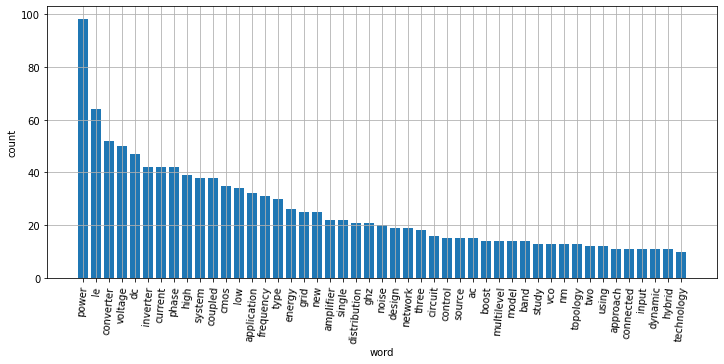

In [102]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

# 워드클라우드

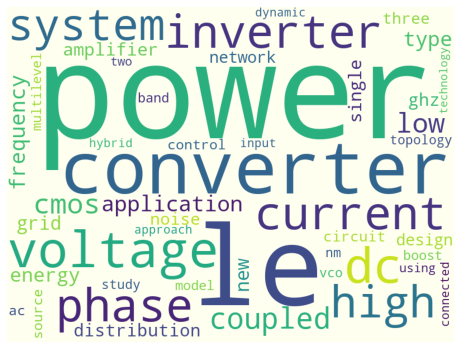

In [103]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [104]:
cloud.to_file("./riss_transformer_wordCloud.jpg")